In [29]:
# Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Data Description :

# Undergrad : person is under graduated or not
# Marital.Status : marital status of a person
# Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
# Work Experience : Work experience of an individual person
# Urban : Whether that person belongs to urban area or not



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.isnull().value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
False      False           False           False            False            False    600
dtype: int64

In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
df=pd.get_dummies(df,columns=['Undergrad','Urban','Marital_Status'],drop_first=True)
df

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single
0,68833,50047,10,0,1,0,1
1,33700,134075,18,1,1,0,0
2,36925,160205,30,0,1,1,0
3,50190,193264,15,1,1,0,1
4,81002,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,0,0
596,69967,55369,2,1,1,0,0
597,47334,154058,0,0,1,0,0
598,98592,180083,17,1,0,1,0


In [8]:
#led= LabelEncoder()
#df['Marital_Status']=led.fit_transform(df['Marital_Status'])
#df


df['Tax_Inc']=pd.cut(df['Taxable_Income'],bins=[10002,30000,99620],labels=['Risky','Good'])
df

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single,Tax_Inc
0,68833,50047,10,0,1,0,1,Good
1,33700,134075,18,1,1,0,0,Good
2,36925,160205,30,0,1,1,0,Good
3,50190,193264,15,1,1,0,1,Good
4,81002,27533,28,0,0,1,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,0,0,Good
596,69967,55369,2,1,1,0,0,Good
597,47334,154058,0,0,1,0,0,Good
598,98592,180083,17,1,0,1,0,Good


In [9]:
df=pd.get_dummies(df,columns=['Tax_Inc'],drop_first=True)

In [10]:
df

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single,Tax_Inc_Good
0,68833,50047,10,0,1,0,1,1
1,33700,134075,18,1,1,0,0,1
2,36925,160205,30,0,1,1,0,1
3,50190,193264,15,1,1,0,1,1
4,81002,27533,28,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,0,0,1
596,69967,55369,2,1,1,0,0,1
597,47334,154058,0,0,1,0,0,1
598,98592,180083,17,1,0,1,0,1


In [11]:
df.duplicated().value_counts()

False    600
dtype: int64

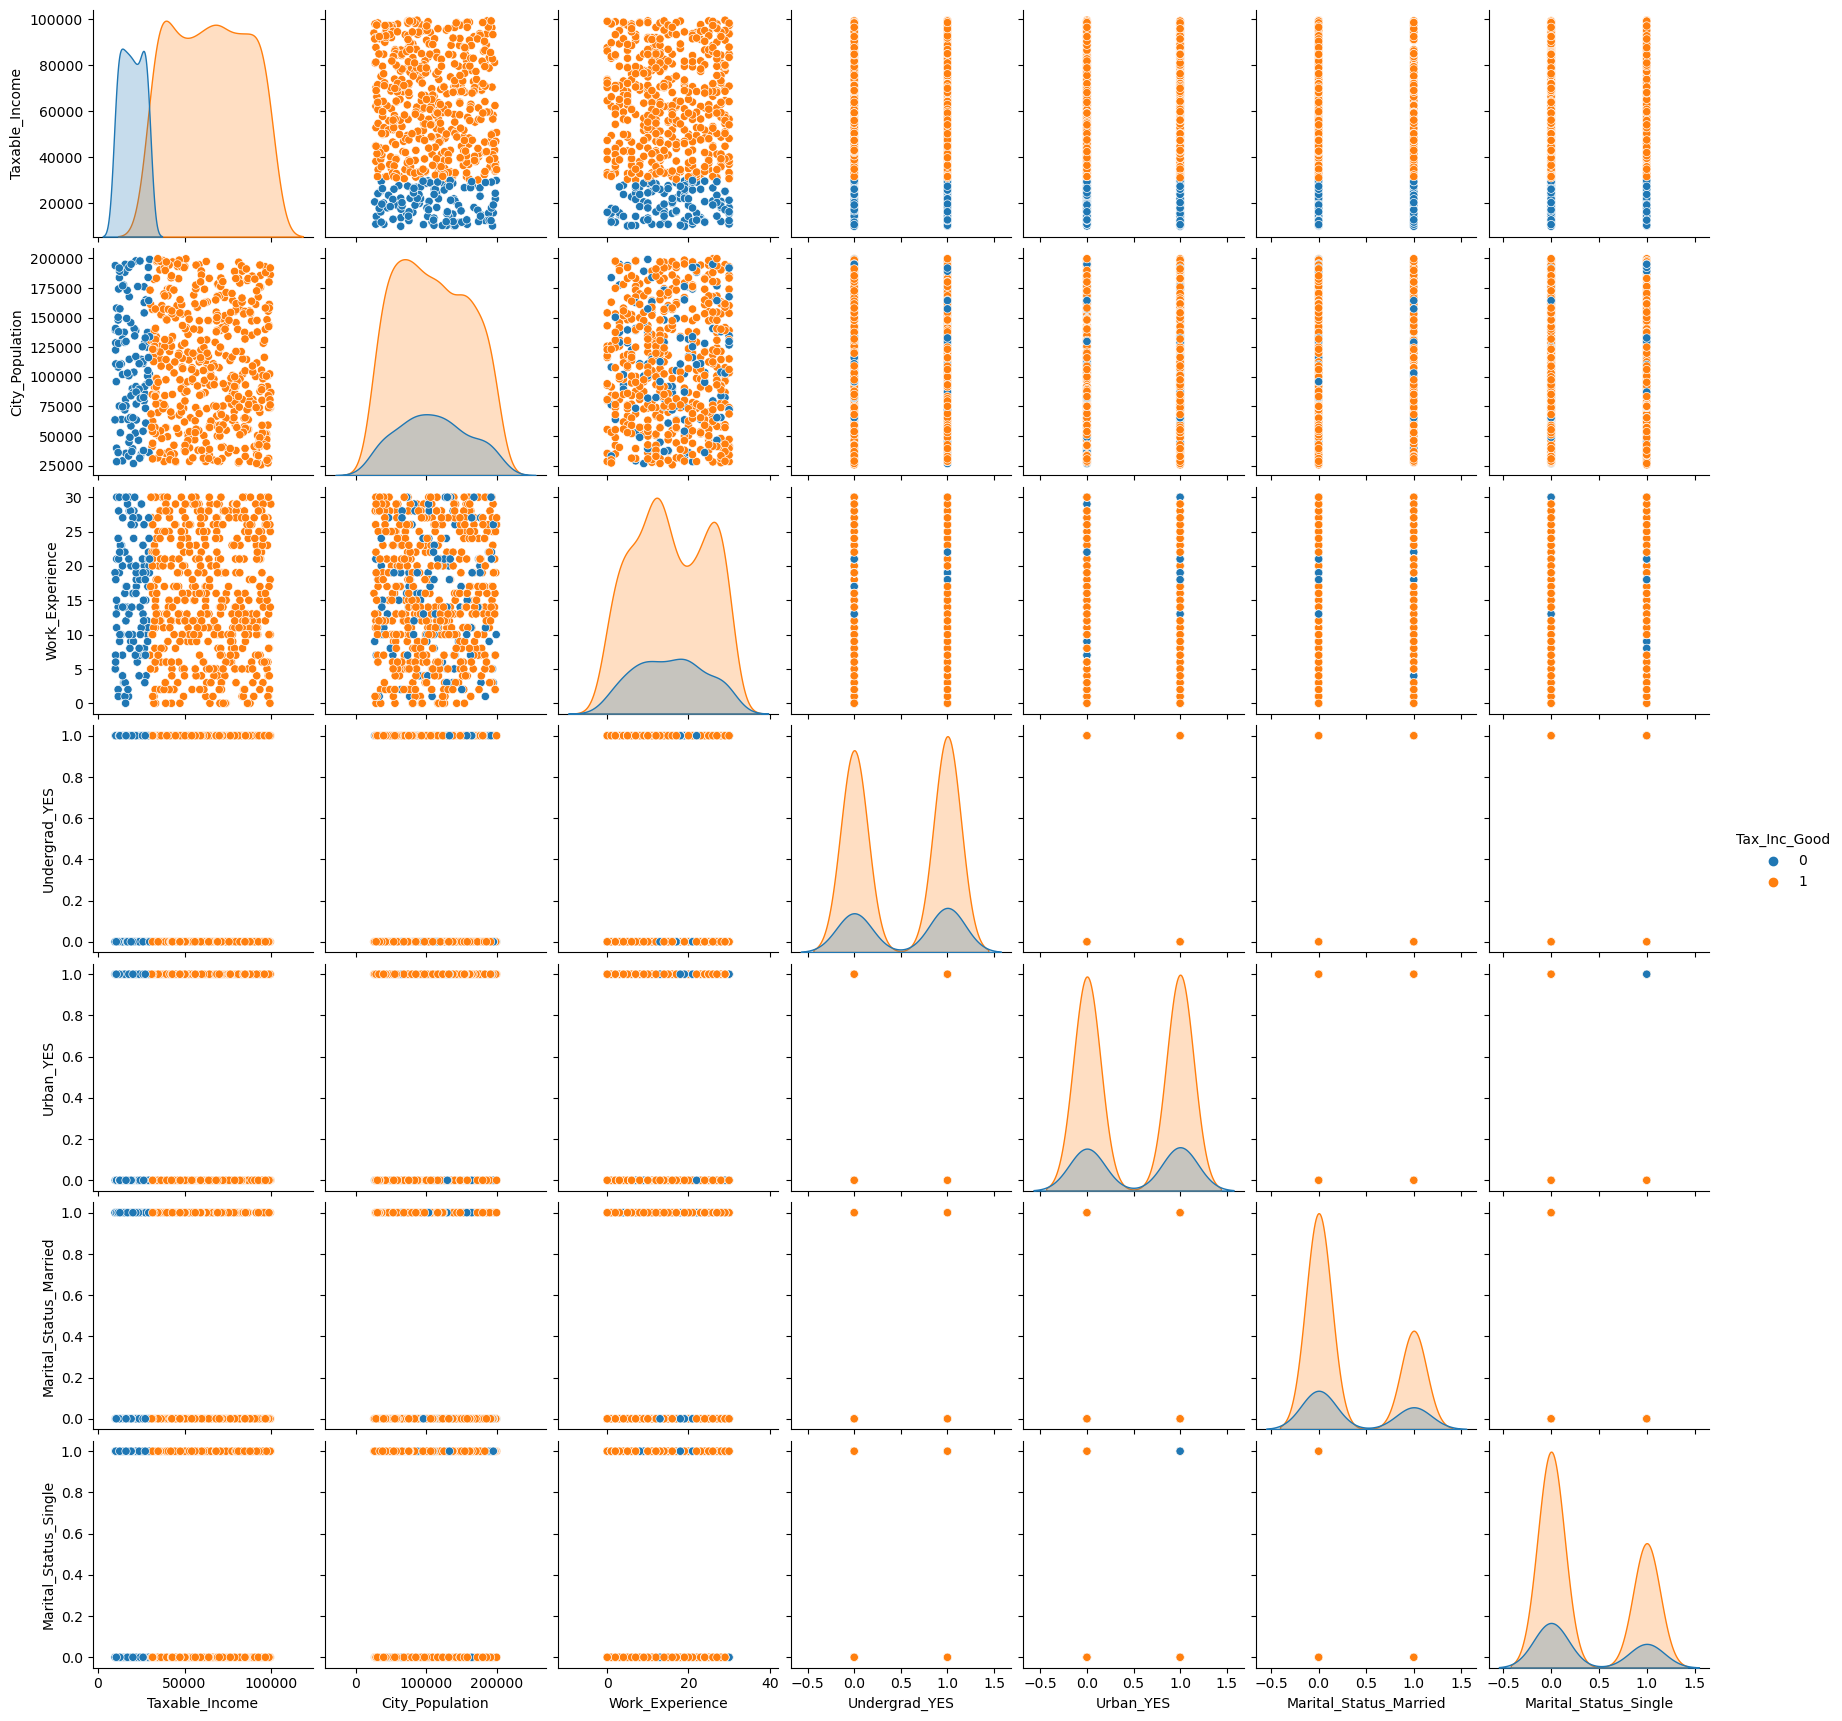

In [12]:
sns.pairplot(df,hue='Tax_Inc_Good')

In [14]:
from sklearn.preprocessing import StandardScaler
x=df.iloc[:,1:]
x

#y=df['']

,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single,Tax_Inc_Good
0,50047,10,0,1,0,1,1
1,134075,18,1,1,0,0,1
2,160205,30,0,1,1,0,1
3,193264,15,1,1,0,1,1
4,27533,28,0,0,1,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,1,0,0,1
596,55369,2,1,1,0,0,1
597,154058,0,0,1,0,0,1
598,180083,17,1,0,1,0,1


In [16]:
sc=StandardScaler()
dfNew=sc.fit_transform(x)
dfNew=pd.DataFrame(dfNew,columns=x.columns)
dfNew

,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single,Tax_Inc_Good
0,-1.178521,-0.629143,-1.040833,0.993355,-0.691254,1.328524,0.510396
1,0.508500,0.276370,0.960769,0.993355,-0.691254,-0.752715,0.510396
2,1.033109,1.634639,-1.040833,0.993355,1.446646,-0.752715,0.510396
3,1.696831,-0.063197,0.960769,0.993355,-0.691254,1.328524,0.510396
4,-1.630532,1.408261,-1.040833,-1.006689,1.446646,-0.752715,0.510396
...,...,...,...,...,...,...,...
595,-1.390432,-0.968710,0.960769,0.993355,-0.691254,-0.752715,0.510396
596,-1.071672,-1.534655,0.960769,0.993355,-0.691254,-0.752715,0.510396
597,0.909696,-1.761033,-1.040833,0.993355,-0.691254,-0.752715,0.510396
598,1.432197,0.163181,0.960769,-1.006689,1.446646,-0.752715,0.510396


In [34]:
lb=LabelEncoder()
dfNew['Tax_Inc_Good']=lb.fit_transform(y)
dfNew

,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single,Tax_Inc_Good
0,-1.178521,-0.629143,-1.040833,0.993355,-0.691254,1.328524,1
1,0.508500,0.276370,0.960769,0.993355,-0.691254,-0.752715,1
2,1.033109,1.634639,-1.040833,0.993355,1.446646,-0.752715,1
3,1.696831,-0.063197,0.960769,0.993355,-0.691254,1.328524,1
4,-1.630532,1.408261,-1.040833,-1.006689,1.446646,-0.752715,1
...,...,...,...,...,...,...,...
595,-1.390432,-0.968710,0.960769,0.993355,-0.691254,-0.752715,1
596,-1.071672,-1.534655,0.960769,0.993355,-0.691254,-0.752715,1
597,0.909696,-1.761033,-1.040833,0.993355,-0.691254,-0.752715,1
598,1.432197,0.163181,0.960769,-1.006689,1.446646,-0.752715,1


In [35]:
x=dfNew.iloc[:,:-1]
y=dfNew['Tax_Inc_Good']
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Tax_Inc_Good, Length: 600, dtype: int64

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

# Decision Tree Classification Using Entropy

In [37]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.12      0.04      0.06        23
           1       0.80      0.93      0.86        97

    accuracy                           0.76       120
   macro avg       0.46      0.49      0.46       120
weighted avg       0.67      0.76      0.71       120



In [38]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 0.7958333333333333
Testing Accuracy: 0.7583333333333333


In [39]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

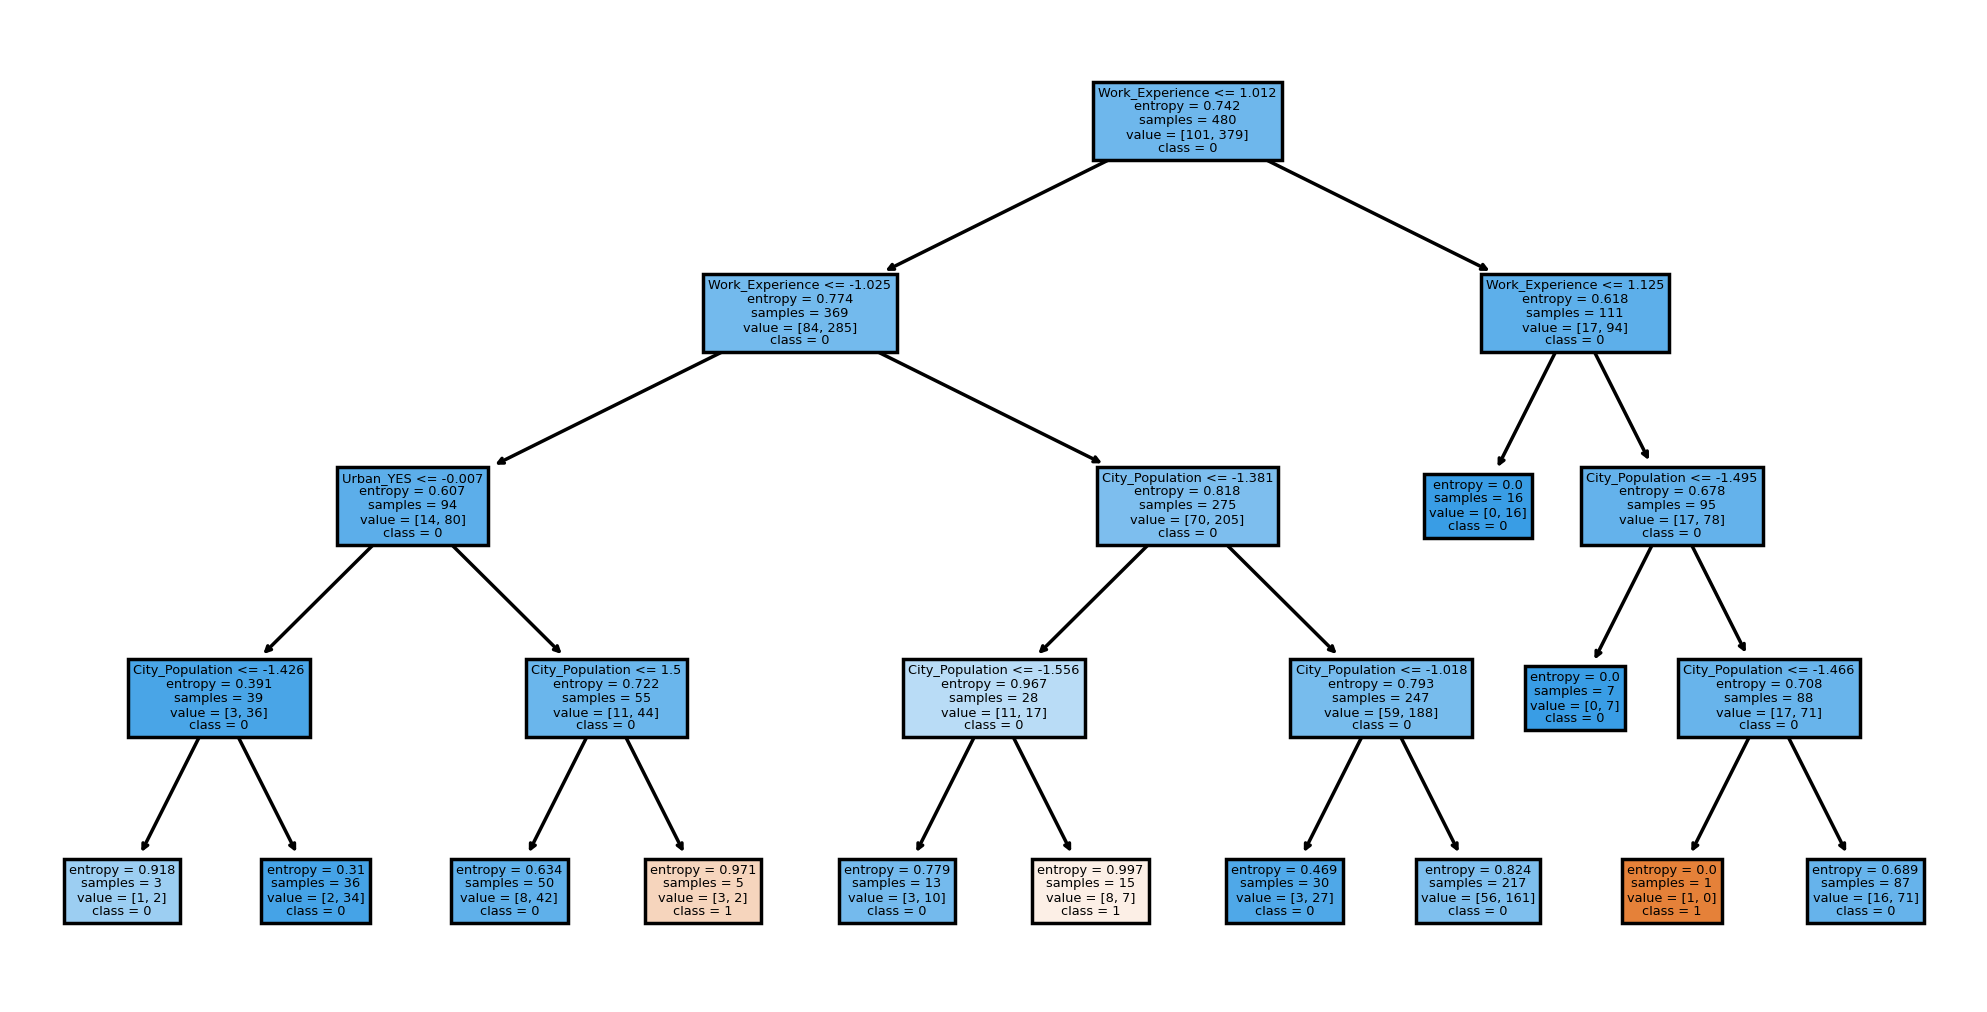

In [40]:
tree.plot_tree(dt,feature_names=x.columns,class_names=dfNew['Tax_Inc_Good'].unique().astype(str),filled=True)
plt.show()

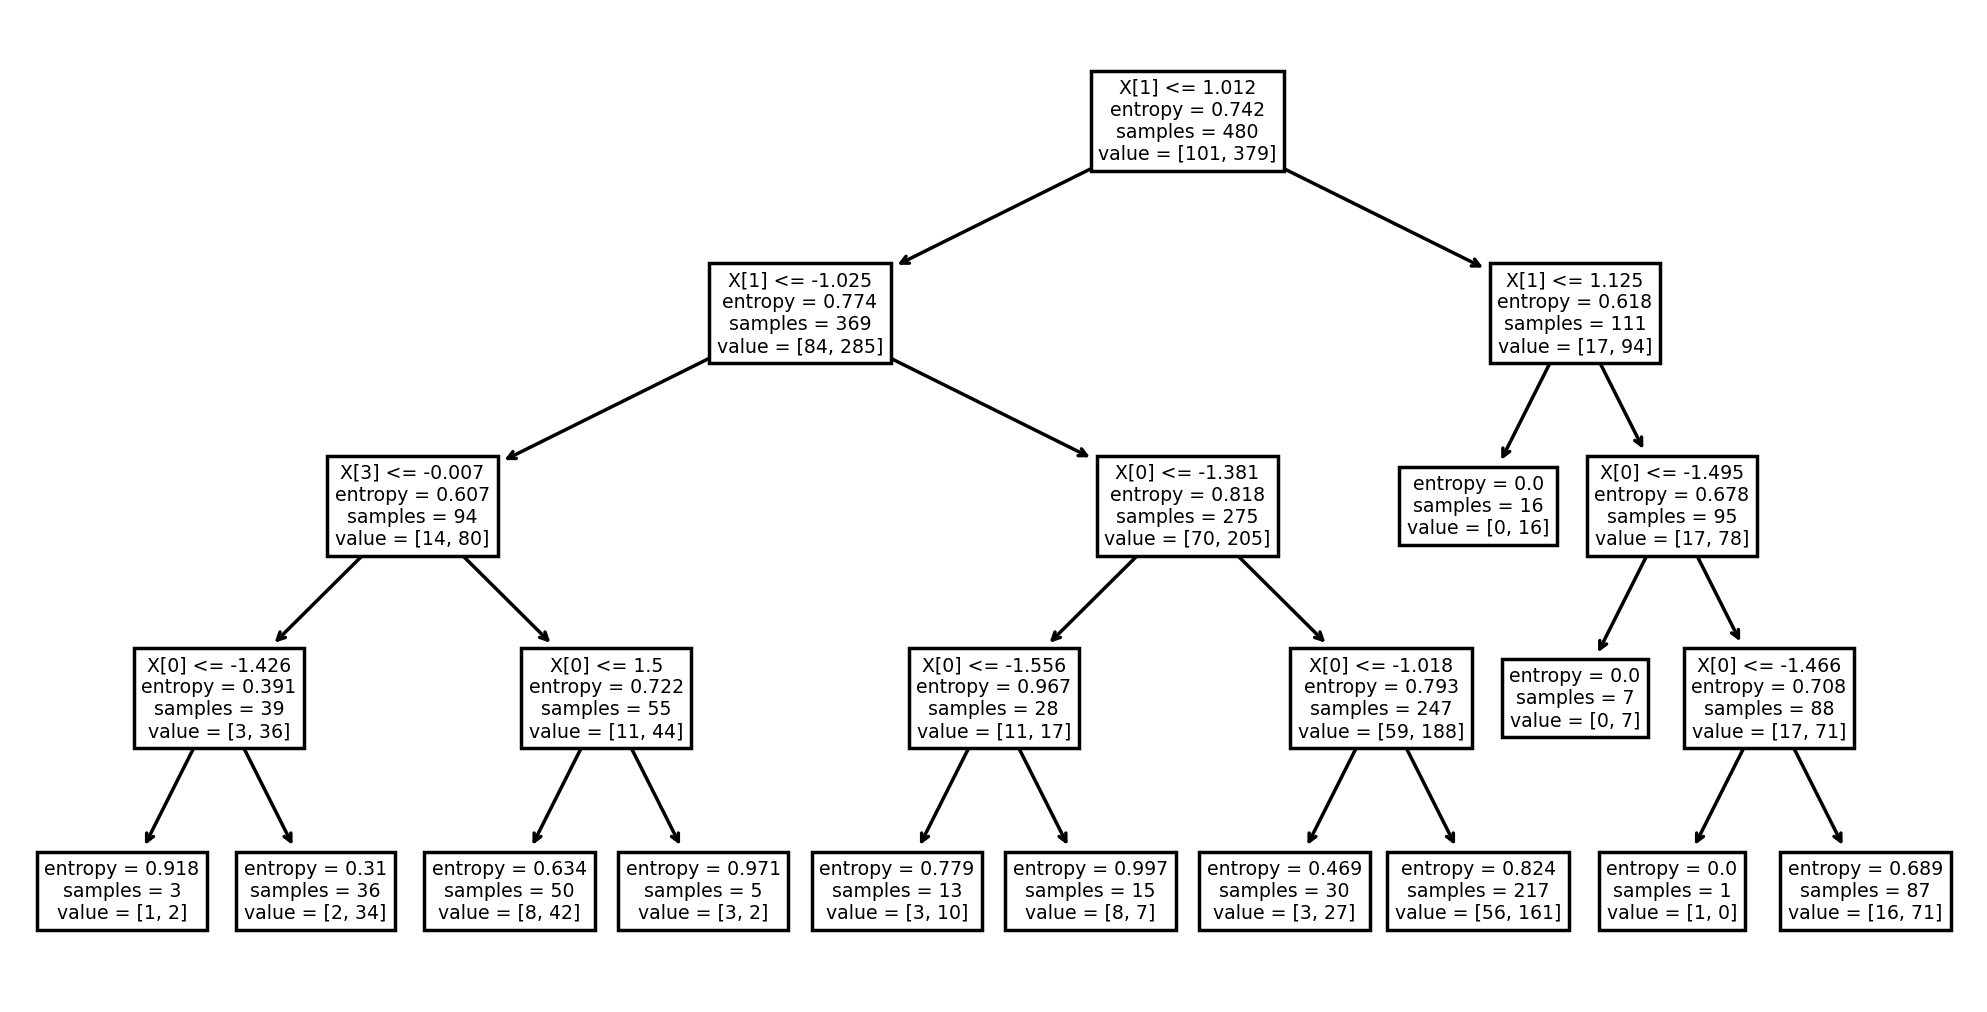

In [41]:
tree.plot_tree(dt)
plt.show()

In [42]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(xtrain,ytrain)
ypred_gini=dt_gini.predict(xtest)
print(classification_report(ytest,ypred_gini))

              precision    recall  f1-score   support

           0       0.12      0.17      0.15        23
           1       0.78      0.71      0.75        97

    accuracy                           0.61       120
   macro avg       0.45      0.44      0.45       120
weighted avg       0.66      0.61      0.63       120



# HyperPArameter Tunning

In [43]:
from sklearn.model_selection import GridSearchCV


In [44]:
dt=DecisionTreeClassifier()
params={
        'criterion':['gini','entropy'],
        'max_depth':[1,2,3,4,5],
        'splitter':['random','best']
       }
grid=GridSearchCV(dt,params)
grid.fit(xtrain,ytrain)
ypred_grid=grid.predict(xtest)
print(classification_report(ytest,ypred_grid))

              precision    recall  f1-score   support

           0       0.25      0.04      0.07        23
           1       0.81      0.97      0.88        97

    accuracy                           0.79       120
   macro avg       0.53      0.51      0.48       120
weighted avg       0.70      0.79      0.73       120



In [45]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [46]:
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='random')
dt_gini.fit(xtrain,ytrain)
ypred_gini=dt_gini.predict(xtest)
print(classification_report(ytest,ypred_gini))
print(dt_gini.score(xtrain,ytrain))
print(dt_gini.score(xtest,ytest))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.81      0.99      0.89        97

    accuracy                           0.80       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.65      0.80      0.72       120

0.79375
0.8


# Decision Tree REgression

In [47]:
df

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Urban_YES,Marital_Status_Married,Marital_Status_Single,Tax_Inc_Good
0,68833,50047,10,0,1,0,1,1
1,33700,134075,18,1,1,0,0,1
2,36925,160205,30,0,1,1,0,1
3,50190,193264,15,1,1,0,1,1
4,81002,27533,28,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,0,0,1
596,69967,55369,2,1,1,0,0,1
597,47334,154058,0,0,1,0,0,1
598,98592,180083,17,1,0,1,0,1


In [50]:
x=df.iloc[:,0:7]
y=df['Tax_Inc_Good']
x,y

(     Taxable_Income  City_Population  Work_Experience  Undergrad_YES  \
 0             68833            50047               10              0   
 1             33700           134075               18              1   
 2             36925           160205               30              0   
 3             50190           193264               15              1   
 4             81002            27533               28              0   
 ..              ...              ...              ...            ...   
 595           76340            39492                7              1   
 596           69967            55369                2              1   
 597           47334           154058                0              0   
 598           98592           180083               17              1   
 599           96519           158137               16              0   
 
      Urban_YES  Marital_Status_Married  Marital_Status_Single  
 0            1                       0                  

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [52]:
dr=DecisionTreeRegressor()
dr.fit(xtrain,ytrain)
yp=dr.predict(xtest)
#print(classification_report(ytest,yp))
#print('Training Accuracy:',dr.score(xtrain,ytrain))
print('Testing Accuracy:',dr.score(xtest,ytest))




Testing Accuracy: 1.0


In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(ytest,yp)

1.0

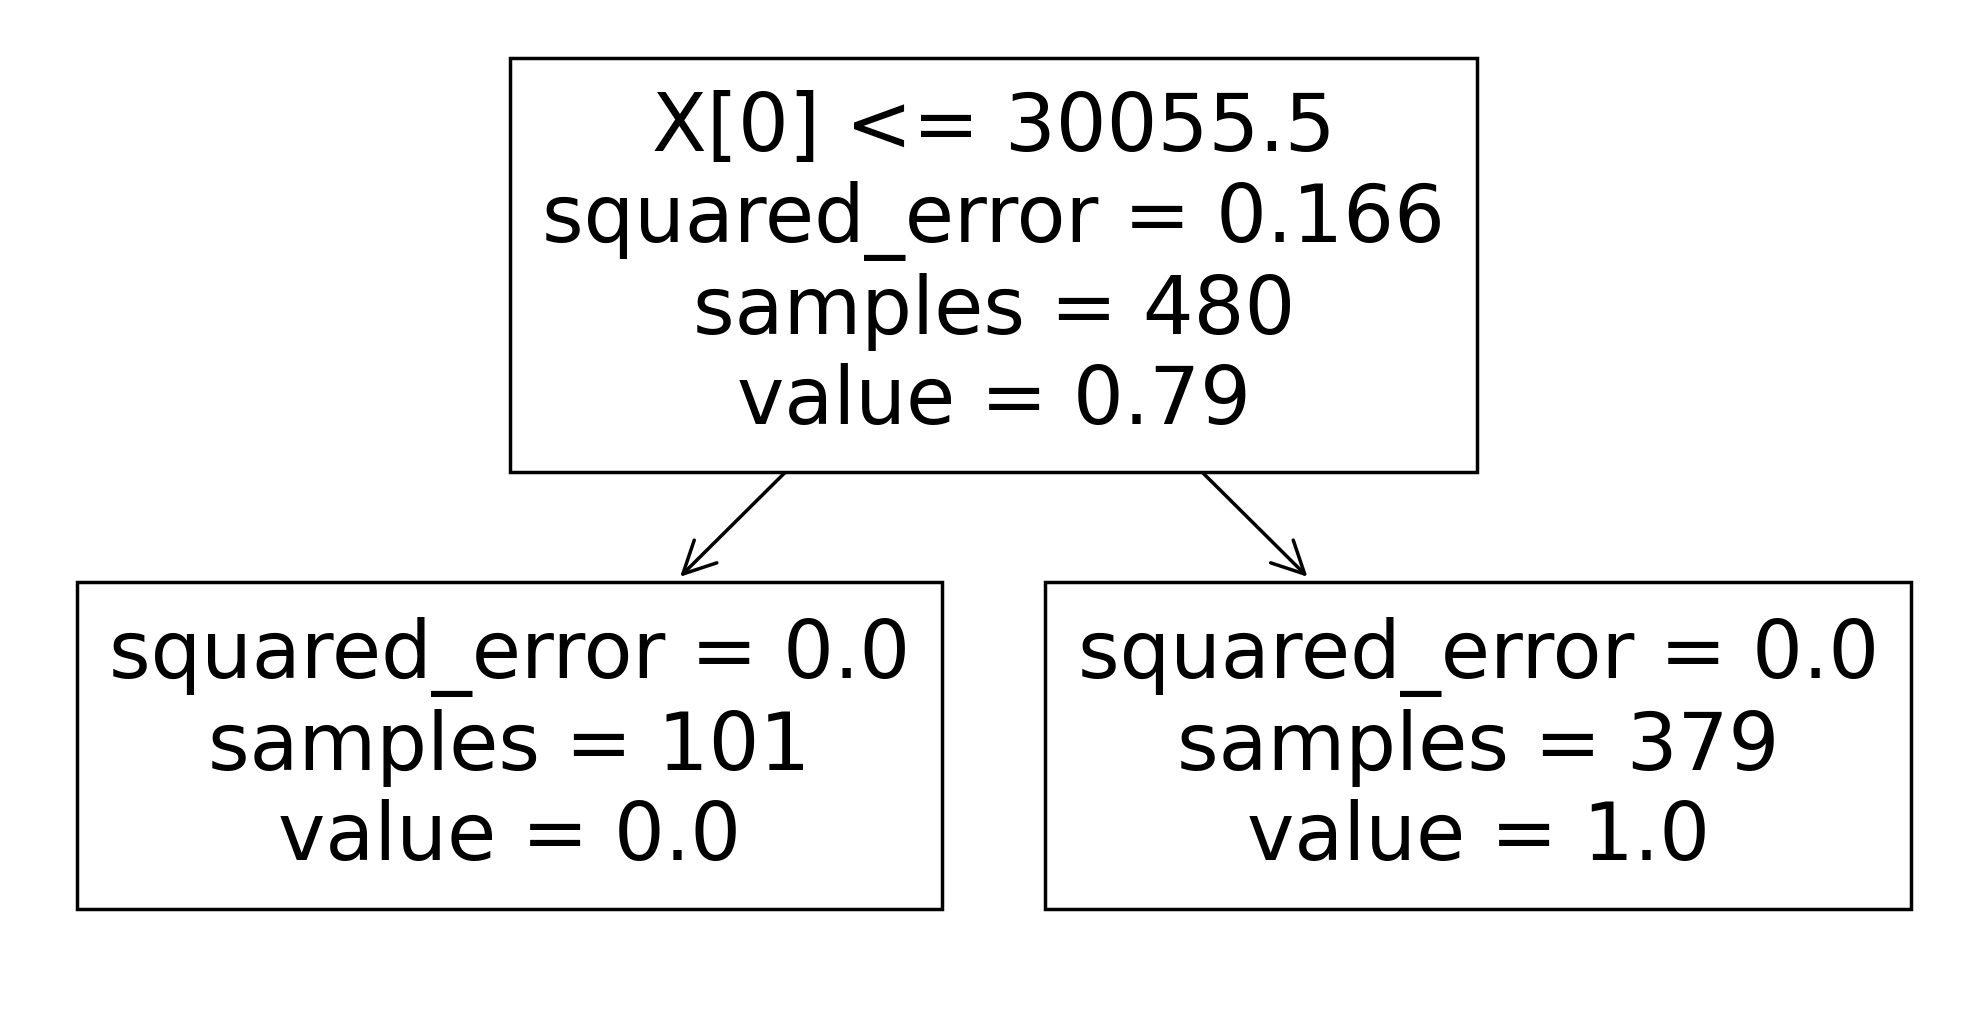

In [55]:
tree.plot_tree(dr)
plt.show()